In [1]:
from hossam import load_data, my_dpi
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [2]:
origin = load_data("wine_qt")
origin.head()

이 데이터셋은 와인의 화학적·물리적 특성을 나타내는 연속형 변수들과, 이를 종합해 평가한 품질 점수(quality)로 구성되어 있습니다. (출처: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset)

변수                  설명
--------------------  ----------------
fixed acidity         고정 산도
volatile acidity      휘발성 산도
citric acid           구연산
residual sugar        잔당
chlorides             염화물
free sulfur dioxide   유리 아황산
total sulfur dioxide  총 아황산
density               밀도
pH                    산성도
sulphates             황산염
alcohol               알코올 도수
quality               품질 점수 (0~10)



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df1= origin.drop("quality", axis=1)
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [5]:
scaler = StandardScaler()
sdf = DataFrame(scaler.fit_transform(df1), columns=df1.columns)
sdf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601
3,1.653789,-1.399789,1.483400,-0.466421,-0.252560,0.135127,0.429852,0.659792,-0.964363,-0.456235,-0.593601
4,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382


In [7]:
estimator = PCA(n_components="mle", random_state=52)
pca = estimator.fit_transform(sdf)
pca

array([[-1.56154478,  0.44489171, -1.76720916, ...,  0.33008582,
        -0.01154807, -0.24961113],
       [-0.76089236,  1.91505819, -0.8641578 , ..., -0.74693875,
         0.54764364,  0.00519571],
       [-0.70808539,  0.91442316, -1.14236292, ..., -0.57565201,
         0.08411791, -0.20371481],
       ...,
       [-2.12463519,  0.87380431,  0.62657264, ...,  0.35760108,
         1.00809106,  0.29669087],
       [-2.20853569,  0.92834262,  1.815403  , ...,  0.26946144,
         1.15057722,  0.43650587],
       [-2.24173343,  1.00318928,  0.65088927, ...,  0.49897478,
         0.70794013,  0.74328967]], shape=(1143, 10))

In [9]:
n = pca.shape[1]
cols = [f"PC{i+1}" for i in range(n)]

pca_df = DataFrame(pca, columns =cols)
pca_df["target"] = origin["quality"]
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,target
0,-1.561545,0.444892,-1.767209,0.132635,0.130138,0.906815,0.122336,0.330086,-0.011548,-0.249611,5
1,-0.760892,1.915058,-0.864158,0.536890,0.090935,-0.860406,0.998623,-0.746939,0.547644,0.005196,5
2,-0.708085,0.914423,-1.142363,0.435075,0.024940,-0.356702,0.536162,-0.575652,0.084118,-0.203715,5
3,2.308166,-0.224448,0.256895,-0.830630,-1.639209,0.154720,-0.300410,0.494589,-0.110087,-0.121798,6
4,-1.561545,0.444892,-1.767209,0.132635,0.130138,0.906815,0.122336,0.330086,-0.011548,-0.249611,5
...,...,...,...,...,...,...,...,...,...,...,...
1138,-1.442233,0.332152,1.137812,0.441063,0.232027,0.499123,0.185077,-0.061655,0.867211,0.217315,6
1139,-1.222998,0.921618,0.027234,0.855285,-0.155510,1.130942,0.605893,-0.364230,0.868018,0.581082,6
1140,-2.124635,0.873804,0.626573,0.399466,-0.177268,-0.063081,-0.221032,0.357601,1.008091,0.296691,5
1141,-2.208536,0.928343,1.815403,0.339723,0.189002,0.665644,0.539637,0.269461,1.150577,0.436506,6


In [11]:
estimator.explained_variance_ratio_

array([0.28692345, 0.17075104, 0.14305928, 0.1101368 , 0.08711032,
       0.06048811, 0.05069067, 0.03809625, 0.03131763, 0.01611195])

In [13]:
estimator.explained_variance_ratio_.cumsum()

array([0.28692345, 0.45767448, 0.60073377, 0.71087056, 0.79798089,
       0.85846899, 0.90915967, 0.94725592, 0.97857355, 0.9946855 ])

In [14]:
estimator = PCA(n_components=0.8, random_state=52)
pca = estimator.fit_transform(sdf)

n=pca.shape[1]
cols = [f"PC{i+1}" for i in range(n)]

pca_df = DataFrame(pca, columns=cols)
pca_df["target"]=origin["quality"]
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,target
0,-1.561545,0.444892,-1.767209,0.132635,0.130138,0.906815,5
1,-0.760892,1.915058,-0.864158,0.536890,0.090935,-0.860406,5
2,-0.708085,0.914423,-1.142363,0.435075,0.024940,-0.356702,5
3,2.308166,-0.224448,0.256895,-0.830630,-1.639209,0.154720,6
4,-1.561545,0.444892,-1.767209,0.132635,0.130138,0.906815,5
...,...,...,...,...,...,...,...
1138,-1.442233,0.332152,1.137812,0.441063,0.232027,0.499123,6
1139,-1.222998,0.921618,0.027234,0.855285,-0.155510,1.130942,6
1140,-2.124635,0.873804,0.626573,0.399466,-0.177268,-0.063081,5
1141,-2.208536,0.928343,1.815403,0.339723,0.189002,0.665644,6


In [15]:
estimator.components_                                                      

array([[ 0.48533856, -0.22714317,  0.46007532,  0.17450629,  0.22487011,
        -0.04785179,  0.01506861,  0.39968417, -0.43284424,  0.23755529,
        -0.11879903],
       [-0.10232799,  0.28878641, -0.14650773,  0.2522617 ,  0.15313338,
         0.51702178,  0.57739283,  0.21753697, -0.00637351, -0.06228016,
        -0.38163504],
       [-0.12237612, -0.44371805,  0.24684311,  0.09135939, -0.05256247,
         0.42828836,  0.32342387, -0.33423846,  0.05992279,  0.30276801,
         0.47020106],
       [-0.23604559,  0.07728789, -0.06381775, -0.40726337,  0.65266911,
        -0.05080877, -0.0466689 , -0.16401907, -0.00672433,  0.52754686,
        -0.17995347],
       [-0.09737837,  0.25755756, -0.07767357,  0.70114127,  0.27064882,
        -0.14928186, -0.21047961,  0.15154184,  0.28885414,  0.25049523,
         0.34287354],
       [-0.10336891, -0.41609139, -0.08936147, -0.02481684, -0.31893577,
         0.00952849, -0.09487849,  0.4017928 ,  0.50678678,  0.37739484,
        -0.368

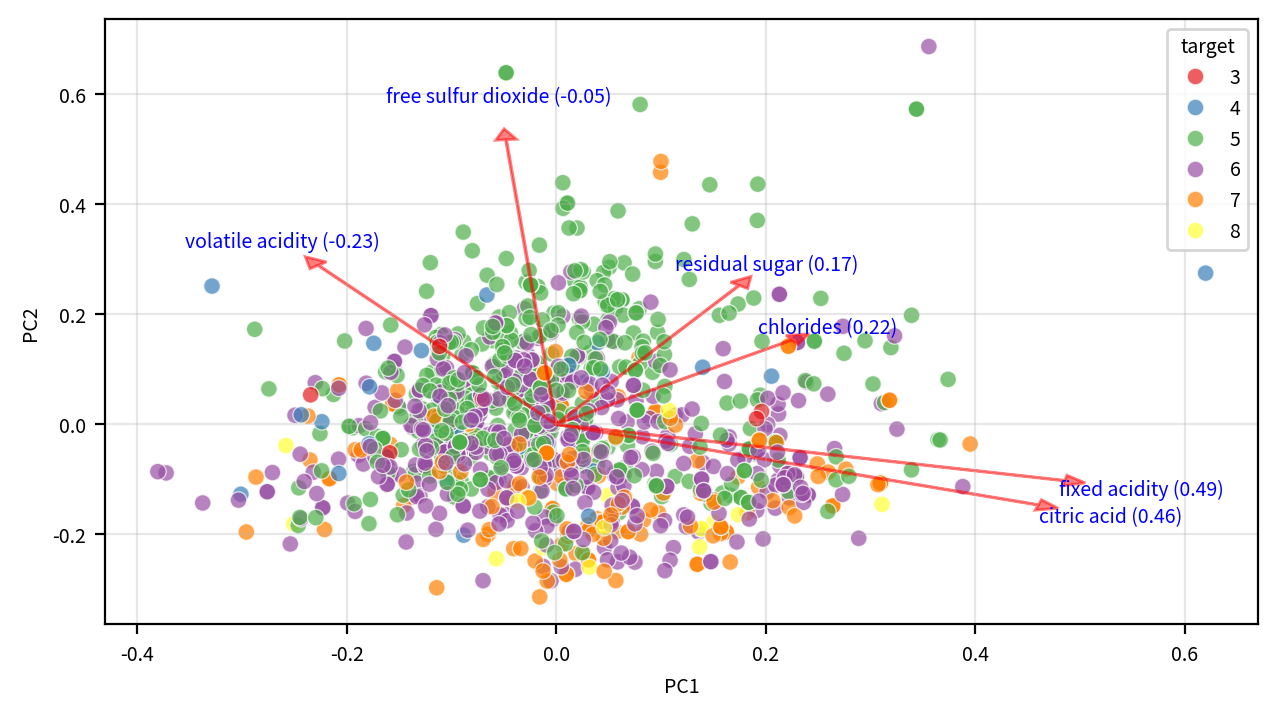

In [19]:
xname= "PC1"
yname = "PC2"
#필요한 정보 추출
score = estimator.transform(sdf)
components = estimator.components_

x_index = pca_df.columns.get_loc(xname)
y_index = pca_df.columns.get_loc(yname)

xs = score[:, x_index]
ys = score[:, y_index]
n = score.shape[1]

scalex = 1.0/ (xs.max()-xs.min())
scaley =1.0/(ys.max()-ys.min())

figsize = (1280/my_dpi, 720/ my_dpi)
fig, ax =plt.subplots(1,1,figsize=figsize, dpi=my_dpi)

sb.scatterplot(
    x=xs * scalex, y=ys*scaley, hue=pca_df["target"], palette="Set1", ax=ax, alpha=0.7
)

for i in range(n):
    ax.arrow(
        0,
        0,
        components[x_index, i],
        components[y_index, i],
        color="r",
        alpha=0.5,
        head_width=0.02,
        head_length=0.02,
    )
    ax.text(
        components[x_index, i] * 1.15,
        components[y_index, i] * 1.15,
        f"{df1.columns[i]} ({components[x_index, i]:.2f})",
        color = "b",
        ha="center",
        va="center",
    )

ax.grid(True, alpha=0.3)
#ax.set_xlim(-1,1)
#ax.set_ylim(-1,1)
ax.set_xlabel(xname)
ax.set_ylabel(yname)

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
()